In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [2]:
#데이터 불러오기
df=pd.read_csv("data/winequality-red.csv")

## 데이터전처리

In [3]:
#결측값 확인
df.isnull().sum()
#df.info() -> 결측값, Dtype을 확인할 수 있음

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#수치형으로 변환
df['quality'] = df['quality'].map({
        3 : 0,
        4 : 0,
        5 : 0,
        6 : 0,
        7 : 1,
        8 : 1         
})

#X와 y값 지정
X=df.drop('quality', axis=1)
y=np.array(df['quality'])

#train data와 test 데이터 지정
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("X_train 크기 :",X_train.shape)
print("y_train 크기 :",y_train.shape)
print("X_test 크기 :",X_test.shape)
print("y_test 크기 :",y_test.shape)

X_train 크기 : (1119, 11)
y_train 크기 : (1119,)
X_test 크기 : (480, 11)
y_test 크기 : (480,)


In [5]:
#depth 지정 및 의사결정나무 알고리즘으로 적합화
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(X_train, y_train)

#예측값
temp_y_pred = tree.predict(X_test)

#예측값과 실제값의 정확도 확인
#print(">예측값\n",temp_y_pred)
#print(">실제값\n",y_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
temp_acc = accuracy_score(y_test, temp_y_pred)
print("정확도 : ", format(temp_acc))

정확도 :  0.8645833333333334


## Decision Tree(의사결정나무)
### 장점
- 분류규칙에 대한 시각화 가능
- 다른 알고리즘은 블랙박스처럼 예측결과의 도출과정을 알 수 없음

### 단점
- 과적합이 일어나기 쉬움 
    - 적당한 가지치기가 필요함

In [6]:
#오차행렬
print(confusion_matrix(y_test, temp_y_pred))
# TN FP
# FN TP

#분류모델의 성능평가
from sklearn.metrics import precision_score, recall_score, f1_score

print('accuracy : ', accuracy_score(y_test,temp_y_pred))
print('precision : ', precision_score(y_test,temp_y_pred))
print('recall : ', recall_score(y_test,temp_y_pred))
print('f1 : ', f1_score(y_test,temp_y_pred))

train_scores, test_scores = list(), list()
#train_score와 test_score의 정확도를 저장 장소
#train_score는 훈련데이터에 특화될수록 증가
#test_score는 테스트데이터에 일반화될수록 증가

#의사결정나무 모델의 depth 조절(1부터 19까지)
for i in range(1,20):
    DT1 = DecisionTreeClassifier(max_depth=i)
    #깊이를 증가시키면서 의사결정나무 모델 적합
    DT1.fit(X_train, y_train)
    
    #training dataset 정확도 평가
    train_att = DT1.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train:%.3f, test:%.3f' %(i,train_acc, test_acc))

[[395  35]
 [ 30  20]]
accuracy :  0.8645833333333334
precision :  0.36363636363636365
recall :  0.4
f1 :  0.380952380952381
>1, train:0.851, test:0.896
>2, train:0.876, test:0.912
>3, train:0.885, test:0.865
>4, train:0.907, test:0.896
>5, train:0.926, test:0.875
>6, train:0.950, test:0.906
>7, train:0.964, test:0.896
>8, train:0.978, test:0.894
>9, train:0.991, test:0.894
>10, train:0.996, test:0.883
>11, train:0.998, test:0.877
>12, train:1.000, test:0.881
>13, train:1.000, test:0.894
>14, train:1.000, test:0.875
>15, train:1.000, test:0.881
>16, train:1.000, test:0.883
>17, train:1.000, test:0.873
>18, train:1.000, test:0.885
>19, train:1.000, test:0.885


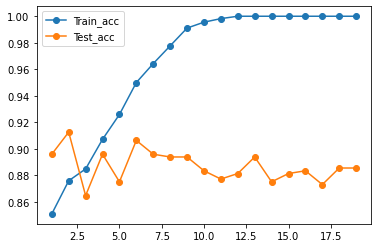

In [7]:
#적합한 depth를 설정할 수 있도록 도와주는 그래프
from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label='Train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label='Test_acc')
pyplot.legend()
pyplot.show()

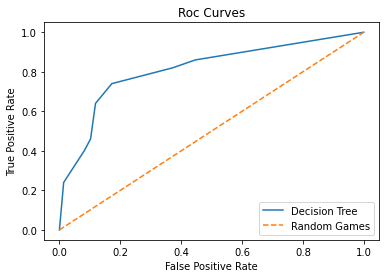

In [8]:
#ROC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,'-',ms=2,label='Decision Tree')
plt.plot([0,1],[0,1],'--', label="Random Games")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curves')
plt.legend(loc="lower right")
plt.show()

In [9]:
#AUC
from sklearn import metrics
roc_auc=metrics.auc(fpr,tpr)
print('Area Under Curve : %0.2f'%roc_auc)

Area Under Curve : 0.81


---
## Random Forest(랜덤포레스트)
- 여러 나무를 모아 숲을 만듦으로써 더 좋은 예측을 하게 하는 앙상블 기법
- 여러 의사결정나무의 분류결과를 취합하여 투표 형태로 결과를 얻음

### 구현방법
- 복원 추출로 데이터 부분집합들을 만들고, 일부 속성을 이용하여 서로 다른 여러 개의 의사결정나무를 만든 후 다수결로 분류

### 장점
- 예측의 변동성이 줄어들며, 과적합(의사결정나무의 단점)을 방지할 수 있음
- 결측치의 비율이 높아져도 높은 정확도를 나타냄

### 단점
- 분류 규칙을 확인할 수 없어 결과에 대한 해석이 제한됨 -> 의사결정나무의 단점과 동일
- 나무의 수를 늘릴수록 의사결정나무에 비해 속도가 크게 떨어짐


In [10]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators : 사용할 tree의 개수
RF = RandomForestClassifier(n_estimators=100, random_state=0)

#RF 모델 적합화
RF.fit(X_train, y_train)
temp_y_pred_rf=RF.predict(X_test)

#정확도 계산
temp_acc=accuracy_score(y_test,temp_y_pred_rf)
print("정확도 : ",format(temp_acc))



#사용할 tree의 개수를 조정하여서 정확도를 계산
scores = []
for i in range(10, 500, 5):
    RF = RandomForestClassifier(n_estimators=i, random_state=0)
    RF.fit(X_train, y_train)
    
    att=RF.predict(X_test)
    acc=accuracy_score(y_test, att)
    scores.append(acc)
    
    print('>%d, accL %.3f'%(i,acc))

정확도 :  0.9270833333333334
>10, accL 0.908
>15, accL 0.919
>20, accL 0.919
>25, accL 0.912
>30, accL 0.917
>35, accL 0.917
>40, accL 0.919
>45, accL 0.923
>50, accL 0.927
>55, accL 0.925
>60, accL 0.929
>65, accL 0.927
>70, accL 0.927
>75, accL 0.925
>80, accL 0.929
>85, accL 0.927
>90, accL 0.927
>95, accL 0.925
>100, accL 0.927
>105, accL 0.927
>110, accL 0.927
>115, accL 0.923
>120, accL 0.925
>125, accL 0.925
>130, accL 0.925
>135, accL 0.927
>140, accL 0.925
>145, accL 0.925
>150, accL 0.927
>155, accL 0.923
>160, accL 0.925
>165, accL 0.925
>170, accL 0.927
>175, accL 0.927
>180, accL 0.927
>185, accL 0.929
>190, accL 0.927
>195, accL 0.929
>200, accL 0.929
>205, accL 0.929
>210, accL 0.929
>215, accL 0.929
>220, accL 0.929
>225, accL 0.929
>230, accL 0.929
>235, accL 0.931
>240, accL 0.927
>245, accL 0.927
>250, accL 0.927
>255, accL 0.927
>260, accL 0.927
>265, accL 0.927
>270, accL 0.927
>275, accL 0.927
>280, accL 0.925
>285, accL 0.925
>290, accL 0.925
>295, accL 0.923
>300, 

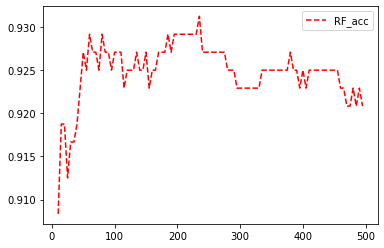

In [11]:
#랜덤포레스트의 나무의 개수에 따른 정확도 시각화
pyplot.plot(range(10,500,5), scores, 'r--', label='RF_acc')
pyplot.legend()

In [12]:
#분류모델 성능평가

#의사결정나무 모델
print("[의사결정나무 모델]")
print('accuracy : ', accuracy_score(y_test, temp_y_pred))
print('precision : ', precision_score(y_test, temp_y_pred))
print('recall : ', recall_score(y_test, temp_y_pred))
print('f1 : ', f1_score(y_test, temp_y_pred))

#랜덤포레스트 모델
print("[랜덤포레스트 모델]")
RF = RandomForestClassifier(n_estimators=235, random_state=0)
RF.fit(X_train, y_train)
temp_y_pred_rf=RF.predict(X_test)
print('accuracy : ', accuracy_score(y_test, temp_y_pred_rf))
print('precision : ', precision_score(y_test, temp_y_pred_rf))
print('recall : ', recall_score(y_test, temp_y_pred_rf))
print('f1 : ', f1_score(y_test, temp_y_pred_rf))

[의사결정나무 모델]
accuracy :  0.8645833333333334
precision :  0.36363636363636365
recall :  0.4
f1 :  0.380952380952381
[랜덤포레스트 모델]
accuracy :  0.93125
precision :  0.6808510638297872
recall :  0.64
f1 :  0.6597938144329897


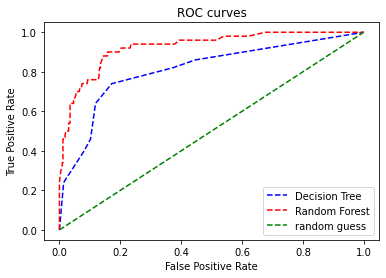

In [13]:
#ROC 시각화
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 =roc_curve(y_test, tree.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, RF.predict_proba(X_test)[:,1])

plt.plot(fpr1, tpr1, 'b--', label='Decision Tree')
plt.plot(fpr2, tpr2, 'r--', label='Random Forest')
plt.plot([0,1], [0,1], 'g--', label='random guess')

plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

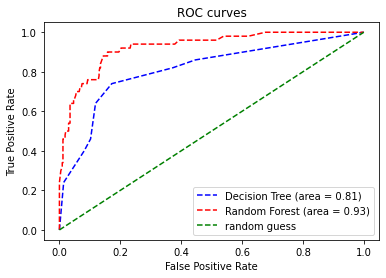

In [14]:
#연혁에 AUC 값 출력
roc_auc_DT = metrics.auc(fpr1, tpr1)
roc_auc_RF = metrics.auc(fpr2, tpr2)

plt.plot(fpr1, tpr1, 'b--', label='Decision Tree (area = %0.2f)' %roc_auc_DT)
plt.plot(fpr2, tpr2, 'r--', label='Random Forest (area = %0.2f)' %roc_auc_RF)
plt.plot([0,1], [0,1], 'g--', label='random guess')

plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

## ROC
- ROC 곡선은 FPR(FP비율)을 X축, TPR(TP비율) y축으로 하는 그래프
- TP = 1, FP = 0 -> 가장 이상적임
- TP = FP -> 가장 최악임 (일직선의 형태)

## AUC
- ROC 곡선을 정량적으로 평가하기 위해 ROC 곡선 아래의 면적을 수치화한 값
- AUC가 높으면 모델의 성능이 우수함을 의미
- AUC의 최대값은 1이며, 1에 가까울수록 우수한 모델

- AUC가 0.7이라고 가정
  - Threshold 좌측 이동시 FN이 줄어들면서 TP가 증가
  - Threshold 우측 이동시 FP가 줄어들면서 TN이 증가